In [1]:
from sympy import *
init_session()

IPython console for SymPy 1.3 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



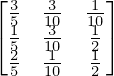

In [2]:
P=Matrix([[6,3,1],
          [2,3,5],
          [4,1,5]])/10
P

# Manually

http://cyber.sibsutis.ru:82/Monarev/docs/nauka/PROBABILITY/Grinstead%20C.M.,%20Snell%20J.L.%20Introduction%20to%20probability%20(free%20web%20draft,%201999)(565s).pdf


In [3]:
var("T_cr T_sr")

(T_cr, Tₛᵣ)

In [4]:
eqns = [-10*T_cr + 5+2*(1+T_sr)+3*(1+T_cr),
        -10*T_sr + 1+3*(1+T_cr)+6*(1+T_sr)]

In [5]:
eqns

[-7⋅T_cr + 2⋅Tₛᵣ + 10, 3⋅T_cr - 4⋅Tₛᵣ + 10]

In [6]:
solve(eqns)

⎧      30       50⎫
⎨T_cr: ──, Tₛᵣ: ──⎬
⎩      11       11⎭

# Again with an absorbing state

In [7]:
destination_state = 2

Q=P[:,:]
Q.col_del(destination_state)
Q.row_del(destination_state)
Q

⎡3/5  3/10⎤
⎢         ⎥
⎣1/5  3/10⎦

In [8]:
N=(eye(Q.shape[0])-Q)**-1
N

⎡35  15⎤
⎢──  ──⎥
⎢11  11⎥
⎢      ⎥
⎢10  20⎥
⎢──  ──⎥
⎣11  11⎦

In [9]:
Nc = N * ones(Q.shape[0],1)
Nc

⎡50⎤
⎢──⎥
⎢11⎥
⎢  ⎥
⎢30⎥
⎢──⎥
⎣11⎦

# General ergodic matrix

In [10]:
import sympy
sympy.N(P**10)

⎡0.4411772416  0.2352959488  0.3235268096⎤
⎢                                        ⎥
⎢0.4411739648  0.235292672   0.3235333632⎥
⎢                                        ⎥
⎣0.4411772416  0.235292672   0.3235300864⎦

In [11]:
d = P.shape[0]
PT=P.T

In [12]:
P.T.eigenvals()

⎧      1   ⅈ     1   ⅈ   ⎫
⎨1: 1, ─ - ─: 1, ─ + ─: 1⎬
⎩      5   5     5   5   ⎭

In [13]:
# Extract eigenvector of eigenvalue == 1
w = [x[2][0] for x in P.T.eigenvects() if x[0]==1]
# Sum to 1
w = w[0]/sum(w[0])
w

⎡ 15 ⎤
⎢ ── ⎥
⎢ 34 ⎥
⎢    ⎥
⎢4/17⎥
⎢    ⎥
⎢ 11 ⎥
⎢ ── ⎥
⎣ 34 ⎦

In [14]:
W = ones(d,1) * w.T
W 

⎡15        11⎤
⎢──  4/17  ──⎥
⎢34        34⎥
⎢            ⎥
⎢15        11⎥
⎢──  4/17  ──⎥
⎢34        34⎥
⎢            ⎥
⎢15        11⎥
⎢──  4/17  ──⎥
⎣34        34⎦

In [15]:
(eye(d)-P+W)

⎡ 143   -11    19  ⎤
⎢ ───   ────   ──  ⎥
⎢ 170   170    85  ⎥
⎢                  ⎥
⎢  41   159        ⎥
⎢ ───   ───   -3/17⎥
⎢ 170   170        ⎥
⎢                  ⎥
⎢        23    14  ⎥
⎢7/170  ───    ──  ⎥
⎣       170    17  ⎦

In [16]:
Z = (eye(d)-P+W)**-1
Z

⎡ 675     71   -84 ⎤
⎢ ───    ───   ────⎥
⎢ 578    578   289 ⎥
⎢                  ⎥
⎢-175    581    86 ⎥
⎢─────   ───   ─── ⎥
⎢ 578    578   289 ⎥
⎢                  ⎥
⎢        -99   341 ⎥
⎢-5/578  ────  ─── ⎥
⎣        578   289 ⎦

In [17]:
def buildM(Z,w):
    d = Z.shape[0]
    M = zeros(d)
    for i in range(d):
        for j in range(d):
            M[i,j] = (Z[j,j]-Z[i,j])/w[j]
    return(M)

In [18]:
buildM(Z,w)

⎡            50⎤
⎢ 0    15/4  ──⎥
⎢            11⎥
⎢              ⎥
⎢            30⎥
⎢10/3   0    ──⎥
⎢            11⎥
⎢              ⎥
⎣8/3    5    0 ⎦

# Oz

In [19]:
Poz = Matrix([[2,1,1],
              [2,0,2],
              [1,1,2]])/4
Poz

⎡1/2  1/4  1/4⎤
⎢             ⎥
⎢1/2   0   1/2⎥
⎢             ⎥
⎣1/4  1/4  1/2⎦

# As functions

In [20]:
def mfpt_to(P,destination_state):
    Q=P[:,:]
    Q.col_del(destination_state)
    Q.row_del(destination_state)
    N=(eye(Q.shape[0])-Q)**-1
    Nc = N * ones(Q.shape[0],1)
    return(Nc)

In [21]:
mfpt_to(P,2)

⎡50⎤
⎢──⎥
⎢11⎥
⎢  ⎥
⎢30⎥
⎢──⎥
⎣11⎦

In [8]:
def stationary_state(P):
    d = P.shape[0]
    w = [x[2][0] for x in P.T.eigenvects() if x[0]==1]
    if len(w)==0:
        raise Exception("No eigenvalue 1. Matrix not ergodic?")
    elif len(w)!=1:
        raise Exception("Eigenvalue 1 multiplicity > 1. Not irreducible?")
    # Sum to 1
    w = w[0]/sum(w[0])
    return(w)

def fundamental_matrix(P):
    d = P.shape[0]
    w = stationary_state(P)
    W = ones(d,1) * w.T
    Z = (eye(d)-P+W)**-1
    return(Z)


def mfpt_full(P):
    d = P.shape[0]
    w = stationary_state(P)
    Z = fundamental_matrix(P)
    M = zeros(d)
    for i in range(d):
        for j in range(d):
            M[i,j] = (Z[j,j]-Z[i,j])/w[j]
    return(M)
    

In [23]:
mfpt_full(P)

⎡            50⎤
⎢ 0    15/4  ──⎥
⎢            11⎥
⎢              ⎥
⎢            30⎥
⎢10/3   0    ──⎥
⎢            11⎥
⎢              ⎥
⎣8/3    5    0 ⎦

In [24]:
sympy.N(mfpt_full(P))

⎡       0          3.75  4.54545454545454⎤
⎢                                        ⎥
⎢3.33333333333333   0    2.72727272727273⎥
⎢                                        ⎥
⎣2.66666666666667  5.0          0        ⎦

In [25]:
mfpt_full(Poz)

⎡ 0    4  10/3⎤
⎢             ⎥
⎢8/3   0  8/3 ⎥
⎢             ⎥
⎣10/3  4   0  ⎦

In [26]:
sympy.N(mfpt_full(Poz))

⎡       0          4.0  3.33333333333333⎤
⎢                                       ⎥
⎢2.66666666666667   0   2.66666666666667⎥
⎢                                       ⎥
⎣3.33333333333333  4.0         0        ⎦

## Maze

In [27]:
maze= Matrix([
    [0  ,	S(1)/2 ,	 0  ,	0 ,	 0  ,	S(1)/2 ,	 0  ,	0 ,	 0  ],
    [S(1)/3 ,	 0 ,	S(1)/3 ,	0 ,	S(1)/3   ,	0 ,	 0  ,	0 ,	 0  ],
    [0  ,	S(1)/2,	 0 ,	S(1)/2 ,	 0  ,	0 ,	 0  ,	0 ,	 0  ],
    [0 ,	 0  ,	S(1)/3 ,	0 ,	 S(1)/3  ,	0 ,	 0  ,	0  ,	S(1)/3 ],
    [0  ,	S(1)/4,	 0 ,	S(1)/4,	  0 ,	S(1)/4 ,	 0 ,	S(1)/4,	 0  ],
    [S(1)/3 ,	 0  ,	0  ,	0  ,	 S(1)/3  ,	0  ,	S(1)/3,	 0 ,	 0  ],
    [0 ,	 0  ,	0  ,	0 ,	 0   ,	S(1)/2 ,	 0 ,	S(1)/2,	 0  ],
    [0 ,	 0  ,	0  ,	0 ,	S(1)/3 ,	0  ,	S(1)/3,	 0 ,	S(1)/3 ],
    [0 ,	 0  ,	0  ,	S(1)/2 ,	 0  ,	0 ,	 0 ,	S(1)/2,	 0  ],
])
maze

⎡ 0   1/2   0    0    0   1/2   0    0    0 ⎤
⎢                                           ⎥
⎢1/3   0   1/3   0   1/3   0    0    0    0 ⎥
⎢                                           ⎥
⎢ 0   1/2   0   1/2   0    0    0    0    0 ⎥
⎢                                           ⎥
⎢ 0    0   1/3   0   1/3   0    0    0   1/3⎥
⎢                                           ⎥
⎢ 0   1/4   0   1/4   0   1/4   0   1/4   0 ⎥
⎢                                           ⎥
⎢1/3   0    0    0   1/3   0   1/3   0    0 ⎥
⎢                                           ⎥
⎢ 0    0    0    0    0   1/2   0   1/2   0 ⎥
⎢                                           ⎥
⎢ 0    0    0    0   1/3   0   1/3   0   1/3⎥
⎢                                           ⎥
⎣ 0    0    0   1/2   0    0    0   1/2   0 ⎦

In [28]:
fundamental_matrix(maze)

⎡ 29                                                          ⎤
⎢ ──    7/16   -1/24  -5/16  -1/12  7/16   -1/24  -5/16  -7/24⎥
⎢ 24                                                          ⎥
⎢                                                             ⎥
⎢        19                                                   ⎥
⎢7/24    ──    7/24   -1/16  1/12   -1/16  -5/24  -5/16  -5/24⎥
⎢        16                                                   ⎥
⎢                                                             ⎥
⎢               29                                            ⎥
⎢-1/24  7/16    ──    7/16   -1/12  -5/16  -7/24  -5/16  -1/24⎥
⎢               24                                            ⎥
⎢                                                             ⎥
⎢                      19                                     ⎥
⎢-5/24  -1/16  7/24    ──    1/12   -5/16  -5/24  -1/16  7/24 ⎥
⎢                      16                                     ⎥
⎢                                       

In [29]:
mfpt_to(maze,4)

⎡6⎤
⎢ ⎥
⎢5⎥
⎢ ⎥
⎢6⎥
⎢ ⎥
⎢5⎥
⎢ ⎥
⎢5⎥
⎢ ⎥
⎢6⎥
⎢ ⎥
⎢5⎥
⎢ ⎥
⎣6⎦

In [30]:
destination_state=4
mr=maze[:,:]
mr.col_del(destination_state)
mr.row_del(destination_state)

In [31]:
fundamental_matrix(mr)

IndexError: list index out of range

In [32]:
mfpt_full(maze)

⎡0   6   15  12  6  6   15  12  18⎤
⎢                                 ⎥
⎢11  0   11  10  5  10  17  12  17⎥
⎢                                 ⎥
⎢15  6   0   6   6  12  18  12  15⎥
⎢                                 ⎥
⎢17  10  11  0   5  12  17  10  11⎥
⎢                                 ⎥
⎢15  9   15  9   0  9   15  9   15⎥
⎢                                 ⎥
⎢11  10  17  12  5  0   11  10  17⎥
⎢                                 ⎥
⎢15  12  18  12  6  6   0   6   15⎥
⎢                                 ⎥
⎢17  12  17  10  5  10  11  0   11⎥
⎢                                 ⎥
⎣18  12  15  6   6  12  15  6   0 ⎦

# Urn

In [33]:
eh=Matrix([
    [0,4,0,0,0],
    [1,0,3,0,0],
    [0,2,0,2,0],
    [0,0,3,0,1],
    [0,0,0,4,0]
])/4
eh

⎡ 0    1    0    0    0 ⎤
⎢                       ⎥
⎢1/4   0   3/4   0    0 ⎥
⎢                       ⎥
⎢ 0   1/2   0   1/2   0 ⎥
⎢                       ⎥
⎢ 0    0   3/4   0   1/4⎥
⎢                       ⎥
⎣ 0    0    0    1    0 ⎦

In [34]:
mfpt_full(eh)

⎡ 0     1    8/3  19/3  64/3⎤
⎢                           ⎥
⎢ 15    0    5/3  16/3  61/3⎥
⎢                           ⎥
⎢56/3  11/3   0   11/3  56/3⎥
⎢                           ⎥
⎢61/3  16/3  5/3   0     15 ⎥
⎢                           ⎥
⎣64/3  19/3  8/3   1     0  ⎦

In [35]:
sympy.N(mfpt_full(eh))

⎡       0                1.0         2.66666666666667  6.33333333333333  21.33
⎢                                                                             
⎢      15.0               0          1.66666666666667  5.33333333333333  20.33
⎢                                                                             
⎢18.6666666666667  3.66666666666667         0          3.66666666666667  18.66
⎢                                                                             
⎢20.3333333333333  5.33333333333333  1.66666666666667         0               
⎢                                                                             
⎣21.3333333333333  6.33333333333333  2.66666666666667        1.0              

33333333333⎤
           ⎥
33333333333⎥
           ⎥
66666666667⎥
           ⎥
 15.0      ⎥
           ⎥
  0        ⎦

# Flux
https://biblioproxy.cnr.it:2114/science/article/pii/S0960077916303009

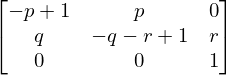

In [3]:
var("p q r")
P=Matrix([[1-p,p,0],
          [q,1-q-r,r],
          [0,0,1]])
P

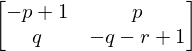

In [6]:
Pr=P[0:2,0:2]
Pr

In [9]:
stationary_state(Pr)

Exception: No eigenvalue 1. Matrix not ergodic?

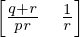

In [34]:
mubar1 = Matrix([1, 0]).T * (eye(*Pr.shape)-Pr)**-1
mubar1 = simplify(mubar1)
mubar1

In [35]:
mubar2 = Matrix([0, 1]).T * (eye(*Pr.shape)-Pr)**-1
mubar2 = simplify(mubar2)
mubar2

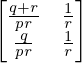

In [36]:
simplify((eye(*Pr.shape)-Pr)**-1)

In [44]:
ex1=[(p,1/10),(q,1/10),(r,1/10)]
mubar1.subs(ex1)

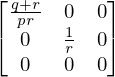

In [46]:
mubar1mat = diag(*mubar1,0)
mubar1mat

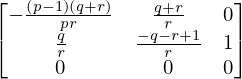

In [47]:
fflux = simplify(mubar1mat * P)
fflux

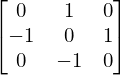

In [48]:
# Consider the upper diagonal only
simplify(fflux-fflux.T)

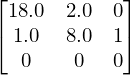

In [49]:
fflux.subs(ex1)

http://www.emma-project.org/v2.4/generated/tpt.html

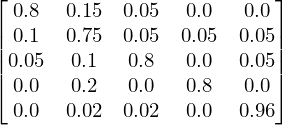

In [52]:
P=Matrix([[0.8,  0.15, 0.05,  0.0,  0.0],
              [0.1,  0.75, 0.05, 0.05, 0.05],
              [0.05,  0.1,  0.8,  0.0,  0.05],
              [0.0,  0.2, 0.0,  0.8,  0.0],
              [0.0,  0.02, 0.02, 0.0,  0.96]])
P

In [53]:
Pr=P[0:4,0:4]
mubar1 = Matrix([1, 0, 0, 0]).T * (eye(*Pr.shape)-Pr)**-1
mubar1

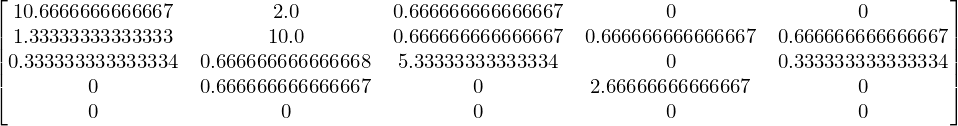

In [54]:
mubar1mat = diag(*mubar1,0)
fflux = mubar1mat * P
fflux


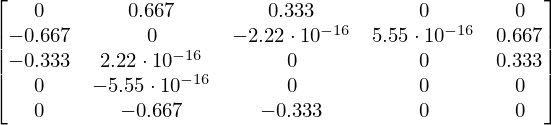

In [58]:
N(fflux-fflux.T,3)

http://ftp.mi.fu-berlin.de/pub/ag-cmb/pyemma-2018-msm-tpt.pdf

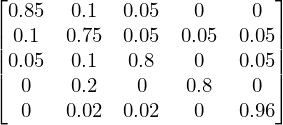

In [63]:
P=Matrix([[ .85 , .1, .05, 0, 0],
         [ .1, .75, .05, .05, .05],
         [.05,.1,.8,0,.05],
         [0,.2,0,.8,0],
         [0,.02,.02,0,.96]])
P

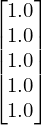

In [64]:
P*ones(5,1)